The purpose of this notebook is to benchmark how well we are able to assay BRCA1. 

2021-06-28. AKS



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import gpplot as gpp
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import auc, roc_curve, roc_auc_score
from scipy import arange
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Set default settings for plotting
sns.set_style('ticks')
sns.set_context('talk')
mpl.rc('pdf', fonttype=42)
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [4]:
def get_roc_auc(df, col):
    df = df.sort_values(by=col)
    df['tp_cumsum'] = np.cumsum(df['tp'])
    df['fp_cumsum'] = np.cumsum(df['fp'])
    df['fpr'] = df['fp_cumsum']/(df['fp_cumsum'].iloc[-1])
    df['tpr'] = df['tp_cumsum']/(df['tp_cumsum'].iloc[-1])
    df.head()
    roc_auc = auc(df['fpr'],df['tpr'])
    roc_df = pd.DataFrame({'False_Positive_Rate':list(df.fpr), 'True_Positive_Rate':list(df.tpr)})
    return roc_auc, roc_df

In [5]:
#read in files with LFCS from all screens

wt_abe = pd.read_csv('../../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-WT-ABE8e_LFC.csv')
wt_cbe = pd.read_csv('../../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-WT-CBE_LFC.csv')
ng_abe = pd.read_csv('../../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-NG-ABE8e_LFC.csv')
ng_cbe = pd.read_csv('../../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-NG-CBE_LFC.csv')
spg_abe = pd.read_csv('../../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-SpG-ABE8e_LFC_v2.csv')
spg_cbe = pd.read_csv('../../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-SpG-CBE_LFC_v2.csv')

Ability to assay BRCA1 itself

In [6]:
#function that designates true postives/false positives based on brca1 data
def get_tpr_fpr(input_data):
    df = input_data.copy()

    # Define true positives and true negatives
    df[str('tp')] = np.nan
    df[str('fp')] = np.nan
    df.loc[df['Mutation bin'].isin(['Nonsense','Splice site']),str('tp')]= 1
    df.loc[df['Mutation bin'].isin(['Nonsense','Splice site' ]),str('fp')]= 0
    df.loc[df['Mutation bin'].isin(['No edits', 'Silent']),str('tp')] = 0
    df.loc[df['Mutation bin'].isin(['No edits', 'Silent']),str('fp')] = 1
    data = df[df[str('tp')].isin([0,1])]
    return data

In [7]:
# apply this function to each data set
wtabe_plot = get_tpr_fpr(wt_abe)
wtcbe_plot = get_tpr_fpr(wt_cbe)
ngabe_plot = get_tpr_fpr(ng_abe)
ngcbe_plot = get_tpr_fpr(ng_cbe)
spgabe_plot = get_tpr_fpr(spg_abe)
spgcbe_plot = get_tpr_fpr(spg_cbe)

In [8]:
#filter brca targeting guides for intermediate/active pams
pamlist4 = pd.read_csv('../../../data_v3/pam_lists/2021-05-11_PAM list 4_v2.csv')
pamlist5 = pd.read_csv('../../../data_v3/pam_lists/2021-05-11_PAM list 5_v2.csv')

In [9]:
#filter NG
ngabe_plot = pd.merge(ngabe_plot, pamlist4, on = 'PAM', how = 'inner')
ngcbe_plot = pd.merge(ngcbe_plot, pamlist4, on = 'PAM', how = 'inner')

In [10]:
#filter SpG
spgabe_plot = pd.merge(spgabe_plot, pamlist5, on = 'PAM', how = 'inner')
spgcbe_plot = pd.merge(spgcbe_plot, pamlist5, on = 'PAM', how = 'inner')

#### WT ABE

In [46]:
print('WT-ABE Avgerage HAP1 + MELJUSO')
a,b = get_roc_auc(wtabe_plot, 'AvgHAP1_Meljuso')
a

WT-ABE Avgerage HAP1 + MELJUSO


0.8147420147420148

In [47]:
print('WT-ABE Avgerage HAP1')
c,d = get_roc_auc(wtabe_plot, 'HAP1_Dropout_RepABC')
c

WT-ABE Avgerage HAP1


0.8083538083538083

In [48]:
print('WT-ABE Avgerage Meljuso')
e,f = get_roc_auc(wtabe_plot, 'Meljuso_Cisplatin_RepABC')
e

WT-ABE Avgerage Meljuso


0.8024570024570025

####  NG-ABE

In [49]:
print('NG-ABE Avgerage HAP1 + MELJUSO')
g,h = get_roc_auc(ngabe_plot, 'AvgHAP1_Meljuso')
g

NG-ABE Avgerage HAP1 + MELJUSO


0.7409404120104253

In [50]:
print('NG-ABE Average Meljuso')
i,j = get_roc_auc(ngabe_plot, 'Meljuso_Cisplatin_RepAB')
i

NG-ABE Average Meljuso


0.7417615766360813

In [51]:
print('NG-ABE Avgerage HAP1')
k,l = get_roc_auc(ngabe_plot, 'HAP1_Dropout_RepAB')
k

NG-ABE Avgerage HAP1


0.7179835053018673

#### SpG-ABE 

In [52]:
print('SpG-ABE Avgerage HAP1 + MELJUSO')
m,n = get_roc_auc(spgabe_plot, 'AvgHAP1_Meljuso')
m

SpG-ABE Avgerage HAP1 + MELJUSO


0.7387778450770577

In [53]:
print('SpG-ABE Average Meljuso')
o,p = get_roc_auc(spgabe_plot, 'Meljuso_Cisplatin_RepAB')
o

SpG-ABE Average Meljuso


0.7321825156470827

In [54]:
print('SpG-ABE Avgerage HAP1')
q,r = get_roc_auc(spgabe_plot, 'HAP1_Dropout_RepAB')
q

SpG-ABE Avgerage HAP1


0.7342687933239114

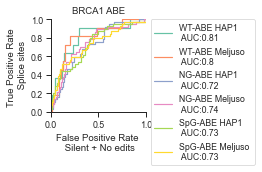

In [55]:
#ABE plot

gpp.set_aesthetics(context='paper', palette='Set2')

fig, ax = plt.subplots(figsize=(1.7, 1.7))



ax.plot(d.False_Positive_Rate, d.True_Positive_Rate, label='WT-ABE HAP1 \n AUC:' + str(np.round(c,2)))
ax.plot(f.False_Positive_Rate, f.True_Positive_Rate, label='WT-ABE Meljuso \n AUC:' + str(np.round(e,2)))

ax.plot(l.False_Positive_Rate, l.True_Positive_Rate, label='NG-ABE HAP1 \n AUC:' + str(np.round(k,2)))
ax.plot(j.False_Positive_Rate, j.True_Positive_Rate, label='NG-ABE Meljuso \n AUC:' + str(np.round(i,2)))

ax.plot(r.False_Positive_Rate, r.True_Positive_Rate, label='SpG-ABE HAP1 \n AUC:' + str(np.round(q,2)))
ax.plot(p.False_Positive_Rate, p.True_Positive_Rate, label='SpG-ABE Meljuso \n AUC:' + str(np.round(o,2)))

ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.legend(facecolor='white', loc='upper right')
#ax.set_aspect('equal')
plt.xlabel('False Positive Rate \n Silent + No edits')
plt.ylabel('True Positive Rate \n Splice sites')
plt.xlim(0.0,1.0)
plt.ylim(0.0, 1.0)
sns.despine()
plt.xlim(0.0,1.0)
plt.title ('BRCA1 ABE')
plt.savefig('../../../Figures/panels/Fig 5/ABE_ROCAUC.pdf', dpi=1000, bbox_inches = 'tight', transparent = True)



#### WT CBE 

In [36]:
print('WT-CBE Avgerage HAP1 + MELJUSO')
a,b = get_roc_auc(wtcbe_plot, 'AvgHAP1_Meljuso')
a

WT-CBE Avgerage HAP1 + MELJUSO


0.8740362201900663

In [37]:
print('WT-CBE Avgerage HAP1')
c,d = get_roc_auc(wtcbe_plot, 'HAP1_Dropout_RepABC')
c

WT-CBE Avgerage HAP1


0.9009324009324009

In [38]:
print('WT-CBE Avgerage Meljuso')
e,f = get_roc_auc(wtcbe_plot, 'Meljuso_Cisplatin_RepABC')
e

WT-CBE Avgerage Meljuso


0.8275058275058275

#### NG-CBE 

In [39]:
print('NG-CBE Avgerage HAP1 + MELJUSO')
g,h = get_roc_auc(ngcbe_plot, 'AvgHAP1_Meljuso')
g

NG-CBE Avgerage HAP1 + MELJUSO


0.7377213888499463

In [40]:
print('NG-CBE Average Meljuso')
i,j = get_roc_auc(ngcbe_plot, 'Meljuso_Cisplatin_RepABC')
i

NG-CBE Average Meljuso


0.6906455909154634

In [41]:
print('NG-CBE Avgerage HAP1')
k,l = get_roc_auc(ngcbe_plot, 'HAP1_Dropout_RepABC')
k

NG-CBE Avgerage HAP1


0.7602925370344409

#### SpG-CBE 

In [42]:
print('SpG-CBE Avgerage HAP1 + MELJUSO')
m,n = get_roc_auc(spgcbe_plot, 'AvgHAP1_Meljuso')
m

SpG-CBE Avgerage HAP1 + MELJUSO


0.7423991435654722

In [43]:
print('SpG-CBE Average Meljuso')
o,p = get_roc_auc(spgcbe_plot, 'Meljuso_Cisplatin_RepAB')
o

SpG-CBE Average Meljuso


0.6945120576966419

In [44]:
print('SpG-CBE Avgerage HAP1')
q,r = get_roc_auc(spgcbe_plot, 'HAP1_Dropout_RepAB')
q

SpG-CBE Avgerage HAP1


0.7643790849673202

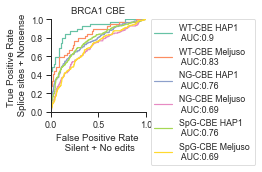

In [45]:
#CBE plot

gpp.set_aesthetics(context='paper', palette='Set2')

fig, ax = plt.subplots(figsize=(1.7, 1.7))



ax.plot(d.False_Positive_Rate, d.True_Positive_Rate, label='WT-CBE HAP1 \n AUC:' + str(np.round(c,2)))
ax.plot(f.False_Positive_Rate, f.True_Positive_Rate, label='WT-CBE Meljuso \n AUC:' + str(np.round(e,2)))

ax.plot(l.False_Positive_Rate, l.True_Positive_Rate, label='NG-CBE HAP1 \n AUC:' + str(np.round(k,2)))
ax.plot(j.False_Positive_Rate, j.True_Positive_Rate, label='NG-CBE Meljuso \n AUC:' + str(np.round(i,2)))

ax.plot(r.False_Positive_Rate, r.True_Positive_Rate, label='SpG-CBE HAP1 \n AUC:' + str(np.round(q,2)))
ax.plot(p.False_Positive_Rate, p.True_Positive_Rate, label='SpG-CBE Meljuso \n AUC:' + str(np.round(o,2)))

ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.legend(facecolor='white', loc='upper right')
#ax.set_aspect('equal')
plt.xlabel('False Positive Rate \n Silent + No edits')
plt.ylabel('True Positive Rate \n Splice sites + Nonsense')
plt.xlim(0.0,1.0)
plt.ylim(0.0, 1.0)
sns.despine()
plt.xlim(0.0,1.0)
plt.title ('BRCA1 CBE')
plt.savefig('../../../Figures/panels/Fig 5/CBE_ROCAUC_v2.pdf', dpi=1000, bbox_inches = 'tight', transparent = True)

